In [13]:
import pandas as pd
import numpy as np
from IPython.display import Image, display
import os

In [10]:
os.getcwd()

'/Users/mhood/experiments/carlyle'

In [42]:
df = pd.read_csv("../facenet/src/preditions.csv")
df.insert(0, "img", df["imgPath"])
df.drop("imgPath", axis=1, inplace=True)

In [78]:
df.head(3)

,img,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,/Users/mhood/image_aligned/aliens/aliens-guy.png,0.018861,0.022585,-0.043924,-0.015520,0.056807,0.117643,0.043205,0.051762,0.046413,...,0.044433,-0.043447,0.088508,0.106559,0.105619,-0.036835,0.171571,-0.003537,-0.029749,0.141456
1,/Users/mhood/image_aligned/bpitt/brad-pitt-bea...,0.093870,-0.158423,-0.169701,-0.134676,-0.093338,-0.095001,0.036096,0.037797,-0.068015,...,-0.072269,-0.028385,0.199985,-0.052342,-0.101111,-0.029482,-0.125027,0.138399,0.068782,-0.059309
2,/Users/mhood/image_aligned/bpitt/brad_pitt.png,0.082226,-0.094282,-0.066782,-0.102673,-0.150132,0.015421,-0.036105,0.167104,-0.017177,...,-0.063244,0.019405,0.061869,-0.020857,-0.171890,-0.085133,-0.077918,0.043694,0.143780,-0.038874


In [47]:
vectors = df.drop('img', axis=1)

In [52]:
# Computes euclidean distance between images.
# Small nunbers mean images are similar and bigger numbers means images are dissimilar

def euclidean(v1, v2):
    return np.sqrt(np.square(v1 - v2).sum())

In [53]:
# Define a simple classifier.
# If the distance between two images is less than some number
# let's say these are the same people.

def is_same_person(distance, threshold):
    if distance < threshold: return "These are the same people."
    return "There are NOT the same people."

# Here are some examples of the classifier correctly identifying two images as being either the same or not the same.

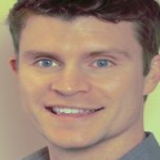

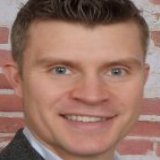

These are the same people.


In [54]:
mhood1 = Image(filename=df.ix[5]["img"])
mhood2 = Image(filename=df.ix[6]["img"])
display(mhood1, mhood2)

distance = euclidean(vectors.ix[5], vectors.ix[6])

# Use a threshold of 1.1 because whatever.
threshold = 1.1
print is_same_person(distance, threshold)

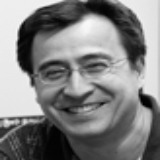

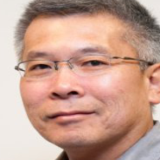

There are NOT the same people.


In [57]:
jbond = Image(filename=df.ix[3]["img"])
tloo = Image(filename=df.ix[7]["img"])
display(jbond, tloo)

distance = euclidean(vectors.ix[3], vectors.ix[7])

print is_same_person(distance, threshold)

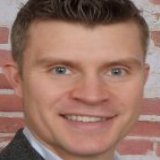

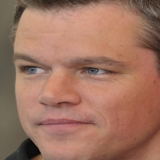

There are NOT the same people.


In [59]:
mhood1 = Image(filename=df.ix[6]["img"])
mdamon = Image(filename=df.ix[4]["img"])
display(mhood1, mdamon)

distance = euclidean(vectors.ix[5], vectors.ix[4])

print is_same_person(distance, threshold)

# It is even robust to beards!

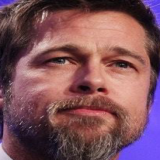

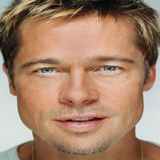

These are the same people.


In [55]:
bpBeard = Image(filename=df.ix[1]["img"])
bpNoBeard = Image(filename=df.ix[2]["img"])
display(bpBeard, bpNoBeard)

distance = euclidean(vectors.ix[1], vectors.ix[2])

print is_same_person(distance, threshold)

# We can also do really interesting things like see which of us in the office looks most like the guy from Ancient Aliens 

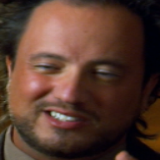

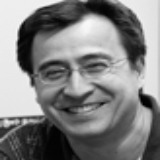

In [77]:
aliensGuyVec = vectors.ix[0]
ixs = [3, 6, 7]
closestIx = np.argmin(vectors[vectors.index.isin(ixs)].apply(lambda v: euclidean(v, aliensGuyVec), axis=1))
winner = Image(filename=df.ix[closestIx]['img'])
aliensGuyImg = Image(filename=df.ix[0]['img'])
display(aliensGuyImg, winner)